In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### <font color = 'green'>Measures of Central Tendency

- Mean
- Median
- Mode

In [5]:
tips = sns.load_dataset('tips')

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

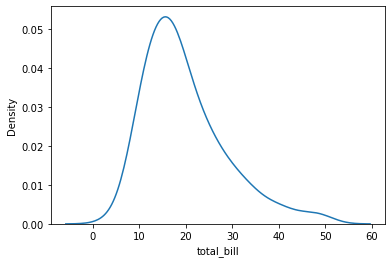

In [8]:
# skewness in the graph indicates presence of outliers in the data
sns.kdeplot(tips.total_bill)

In [9]:
#Average bill of the customers
np.mean(tips.total_bill)

19.785942622950824

In [10]:
#Median bill of the customers
np.median(tips.total_bill)

17.795

The difference between mean and median shows that there are few outliers in the total_bill and we should trust median over mean in this case since mean is affected by the presence of outliers and hence they are not reliable measure of central tendency in the case of outliers present in the data

In [11]:
stats.mode(tips.sex)

ModeResult(mode=array(['Male'], dtype=object), count=array([157]))

We have more male customers visiting the restaurant

### <font color = 'green'>Measures of Spread/Dispersion

- Variance
- Range 
- Standard Deviation
- Interquartile Range

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
#statistical description of the tips data
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
#Total Variance in the total_bill data
np.var(tips.total_bill)

78.92813148851113

In [15]:
#Standard Deviation of the total bill
np.std(tips.total_bill)

8.88415057777113

Standard Deviation of 8.9 means that a customer pays 8.9 dollars more or less than the average bill. But since our data has few outliers, so we will use IQR(Inter-Quartile Range) over Standard Deviation.

In [16]:
q1 = np.percentile(tips.total_bill, 25)
q3 = np.percentile(tips.total_bill, 75)

In [17]:
iqr = q3 - q1

In [18]:
iqr

10.779999999999998

### <font color = 'green'>Outlier Removal using IQR

Note: For now we will focus mainly on removing outlier from the total_bill column

In [23]:
lower_fence = q1 - 1.5 * iqr
upper_fence = q1 + 1.5 * iqr

In [27]:
tips_copy = tips.copy()

In [28]:
#We keep only the values which are greater than lower fence and less than upper fence and drop the
#values outside this range which are basically the outliers
tips_copy = tips_copy[(tips_copy.total_bill >= lower_fence) & (tips_copy.total_bill <= upper_fence)]

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

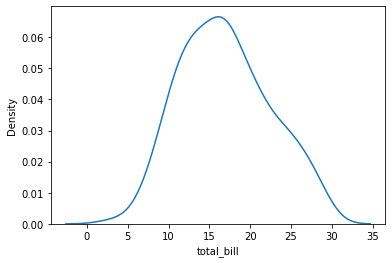

In [29]:
#data now looks more balanced/normal after outlier removal as compared to data with outliers
sns.kdeplot(tips_copy.total_bill)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

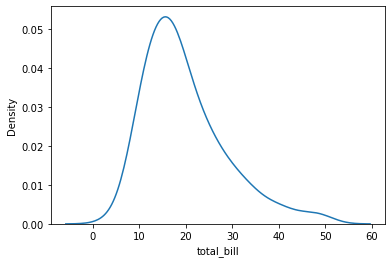

In [30]:
#plot of skewed data with outlier, for comparison with above plot
sns.kdeplot(tips.total_bill)

### <font color = 'green'>Association between Variables(Columns)

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### <font color = 'blue'>Association between 2 numerical columns</font>

**1. Pearson Correlation:**

Pearson correlation measures the linear relationship between two continuous variables.
It assumes that the relationship between the variables is linear and that the data follow a normal distribution.

Pearson correlation coefficient (ρ) ranges from -1 to 1, where:
- ρ=1 indicates a perfect positive linear relationship.
- ρ=−1 indicates a perfect negative linear relationship.
- ρ=0 indicates no linear relationship.

It's sensitive to outliers and can be affected by non-linear relationships.

**2. Spearman Rank Correlation:**

Spearman’s rank correlation measures the strength and direction of association between two ranked variables. It basically gives the measure of monotonicity of the relation between two variables i.e. how well the relationship between two variables could be represented using a monotonic function.

- Monotonically Increasing: As the variable X increases, the variable Y never decreases.
- Monotonically Decreasing: As the variable X increases, the variable Y never increases.
- Not Monotonic: As the X variable increases, the Y variable sometimes decreases and sometimes increases.

It's based on the ranks of the data rather than the actual values.
Spearman correlation coefficient (ρs) ranges from -1 to 1, where:

- ρs = 1 indicates a perfect monotonic positive relationship.
- ρs = −1 indicates a perfect monotonic negative relationship.
- ρs = 0 indicates no monotonic relationship.

It's less sensitive to outliers and non-linear relationships compared to Pearson correlation.
It's suitable for ordinal or skewed data.

**3. Kendall Rank Correlation:**

Kendall correlation also measures the strength of the monotonic relationship between two variables.
Like Spearman correlation, it's based on the ranks of the data.

Kendall correlation coefficient (τ) ranges from -1 to 1, where:

- τ=1 indicates a perfect monotonic positive relationship.
- τ=−1 indicates a perfect monotonic negative relationship.
- τ=0 indicates no monotonic relationship.

It's less affected by outliers and is robust to non-linear relationships.
It's often used when dealing with small sample sizes or tied ranks.

**When to use which method:**

- **`Pearson correlation:`** Use when both variables are continuous and the relationship is assumed to be linear and follow a normal distribution.
- **`Spearman rank correlation:`** Use when the relationship is not necessarily linear, or when the data are ordinal or heavily skewed. It's more robust to outliers.
- **`Kendall rank correlation:`** Use when the relationship is not necessarily linear and when dealing with small sample sizes or tied ranks. It's also robust to outliers.

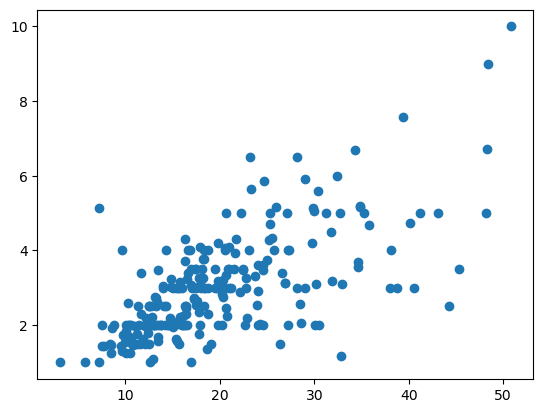

In [12]:
plt.scatter(tips.total_bill, tips.tip)

In [20]:
#covariance amongst 2 numerical columns
np.cov(tips.total_bill, tips.tip)

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

Note: Covariance between these 2 columns is 8.324

In [21]:
#pearson correlation between 2 numerical columns
tips['total_bill'].corr(tips['tip'])

0.6757341092113646

So `total bill` and `tip paid by the customer` has moderate positive relation. In very simple terms it means that generally the customer with higher total bill tend to give more tip but this is not the case with all the customers.

In [9]:
from scipy.stats import spearmanr, kendalltau, pearsonr

#pearson correlation
print(pearsonr(tips['total_bill'], tips['tip'])[0])

#spearman rank correlation code
print(spearmanr(tips['total_bill'], tips['tip'])[0])

#kendall rank correlation
print(kendalltau(tips['total_bill'], tips['tip'])[0])

0.6757341092113642
0.6789681219001009
0.517180972142381


#### <font color = 'blue'>Association between 2 categorical columns

We use contingency table to represent the relation between 2 categorical columns. For this purpose we use pd.crosstab functions and we pass two categorical columns for that.

In [22]:
pd.crosstab(tips.sex, tips.smoker)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


Above table indicates:
- There were 60 male customers who were smokers and 97 of them were non-smoker.
- There were 33 female customers who were smokers and 54 of them were non-smokers.